In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib.patches import Patch

In [2]:
# get data and split into features and target
df = pd.read_csv("../data/final_df_with_target.csv")
X_old = df.drop("POLICY3_target", axis=1)
y_old = df["POLICY3_target"]

# apply SMOTE
sm = SMOTE(random_state=42)
X_new, y_new = sm.fit_resample(X_old, y_old)

# export new data.
df_smote_with_target = pd.DataFrame(X_new, columns = X_old.columns)
df_smote_with_target["POLICY3_target"] = y_new
df_smote_with_target.to_csv("../data/df_smote_with_target.csv", index = False)

# preview exported data.
smote_preview = pd.read_csv("../data/df_smote_with_target.csv")
print(smote_preview.shape)
print(smote_preview["POLICY3_target"].value_counts())
smote_preview.head()

(1947, 85)
POLICY3_target
Coronavirus is a serious illness and we should continue social distancing measures until we can safely relax them, but try to re-open as much as possible as soon as it is reasonable safe.                               649
This is all an overreaction. The disease is not that serious.  We should relax social distancing measure right away.                                                                                                      649
The disease is a large threat to the health of the nation that will force unconscionable choices if we do not all act together to socially distance for as long as needed even if that means great personal sacrifice.    649
Name: count, dtype: int64


,HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,...,MEDIA17_No,MEDIA17_Yes,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know,POLICY3_target
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,Coronavirus is a serious illness and we should...
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,This is all an overreaction. The disease is no...
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,The disease is a large threat to the health of...
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,This is all an overreaction. The disease is no...
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,This is all an overreaction. The disease is no...


/var/folders/tc/m105pgld1c74pmzy1p5qt9wc0000gn/T/ipykernel_22862/2845168423.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


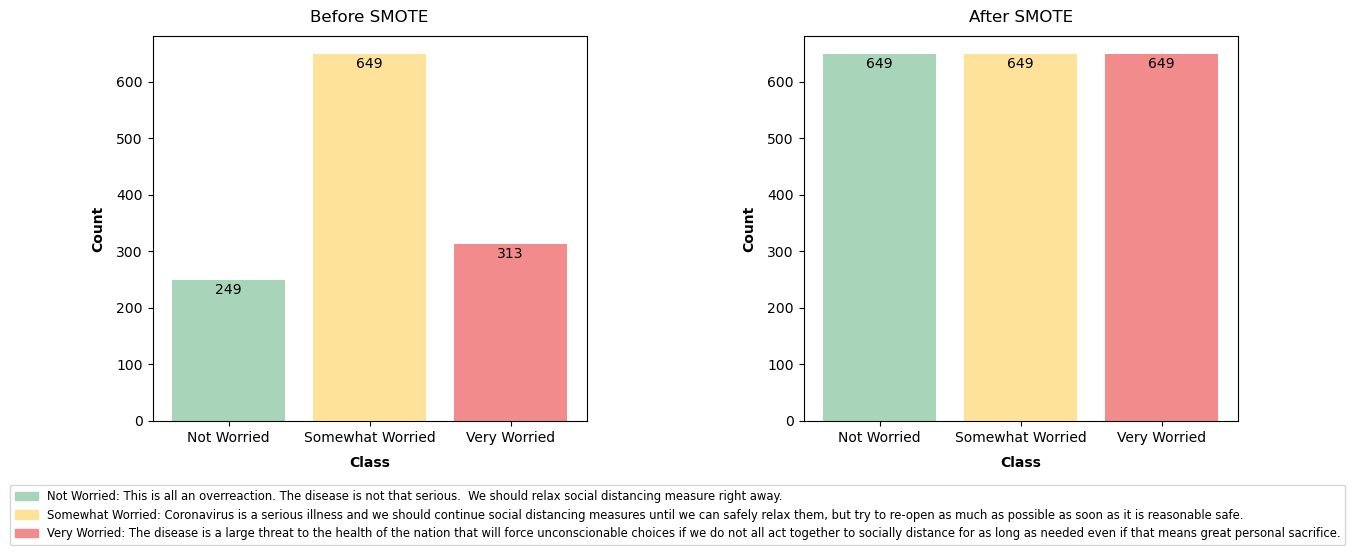

In [23]:
# count class distribution before and after
before_ct = Counter(y_old)
after_ct = Counter(y_new)

label_map = {
    "This is all an overreaction. The disease is not that serious.  We should relax social distancing measure right away.": "Not Worried",
    "Coronavirus is a serious illness and we should continue social distancing measures until we can safely relax them, but try to re-open as much as possible as soon as it is reasonable safe.": "Somewhat Worried",
    "The disease is a large threat to the health of the nation that will force unconscionable choices if we do not all act together to socially distance for as long as needed even if that means great personal sacrifice.": "Very Worried"
}

# plot side-by-side bar graph. get bar values, matching order for both graphs.
class_names = ["Not Worried", "Somewhat Worried", "Very Worried"]
short_to_full = {v: k for k, v in label_map.items()}
before_values = [before_ct.get(short_to_full[name], 0) for name in class_names]
after_values = [after_ct.get(short_to_full[name], 0) for name in class_names]

# generate plot.
fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.5})
colors = ["#A8D5BA", "#FFE299", "#F28C8C"]
axes[0].bar(class_names, before_values, color = colors)
for i, val in enumerate(before_values):
    axes[0].text(i, val - 30, str(val), ha = "center", va = "bottom")
axes[0].set_title("Before SMOTE", pad = 10)
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[1].bar(class_names, after_values, color = colors)
for i, val in enumerate(after_values):
    axes[1].text(i, val - 30, str(val), ha = "center", va = "bottom")
axes[1].set_title("After SMOTE", pad = 10)
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("Class", labelpad = 8, fontweight = "bold")
    ax.set_ylabel("Count", labelpad = 8, fontweight = "bold")

# create a legend for classes.
legend_labels = [f"{name}: {short_to_full[name]}" for name in class_names]
patches = [Patch(color=colors[i % len(colors)], label=legend_labels[i]) for i in range(len(legend_labels))]
fig.legend(handles = patches, loc = "lower center", bbox_to_anchor = (0.5, -0.15), ncol = 1, fontsize = "small", frameon = True)

plt.tight_layout()
plt.show()